# K-Means

## Table of Contents <a name="TOC"></a> 

1.  [Introduction](#1)   
2.  [The Iterative Process](#2)   
3.  [The Single Core Solution](#3)   
    1.  [A 2-Dimensional Example](#3.A)  
    2.  [An N-Dimensional Example](#3.B)
    3.  [An N-Dimensional Example With Dense Data](#3.C)
    4.  [An N-Dimensional Example With Sparse Data](#3.D)   
4.  [The Multi-Core Solution](#4)
    1.  [A 2-Dimensional Example](#4.A)  
    2.  [An N-Dimensional Example](#4.B)
    3.  [An N-Dimensional Example With Dense Data](#4.C)
    4.  [An N-Dimensional Example With Sparse Data](#4.D)   

## 1.  Introduction <a name="1"></a> 
[Back to Table of Contents](#TOC)

The k-means clustering algorithm is a workhorse in machine learning.  It is an unsupervised learning technique that groups similar objects into a given number of clusters.  It is simple and intuitive.  For each cluster, there is a centroid, which is defined as the mean of all the objects that belong to the cluster.  It serves as a prototype of the cluster.  Each object belongs to the cluster with the nearest centroid.

K-means has several important characteristics.  It is a **non-hierarchical**, or **flat**, algorithm.  There is no inherent structure or relationship between the different clusters.  It is also a **hard** clustering algorithm.  Each object belongs to only one cluster.  Finally, k-means is an **exhaustive** algorithm.  Every object is assigned to a cluster.  No objects are left out.

The algorithm uses an iterative refinement approach to find the centroids of each cluster.  Note that if a centroid is moved, the set of objects that are nearest to it can change, which in turn changes the cluster's average, again moving the centroid.  We must find a fixed point of this system, where moving the centroid does not change the members of its cluster.  To do this, we employ a two-step algorithm.

## 2. The Iterative Process <a name="2"></a>
[Back to Table of Contents](#TOC)  

**Step 0:  Initialize the Centroids**   
First, we randomly choose a starting set of $K$ centroids.  These can be random points in Euclidean n-space or randomly chosen objects from the dataset.    


**Step 1:  Assign Points to the Nearest Centroid**   
Next, for each object in our dataset, we calculate the nearest centroid and assign the object to that cluster.  


**Step 2:  Recompute the Centroids**    
Finally, we find new centroids by calculating the average of the members of each cluster.   

**Repeat:  Until A Termination Condition Is Met**   
We repeat Steps 1 and 2 until convergence to the fixed point or until another termination condition is met, such as a maximum number of iterations.


## 3. The Single Core Solution <a name="3"></a>
[Back to Table of Contents](#TOC)

The k-means iterative process requires that the dataset is run through twice.  When using just one processor, the code will work through each line of data assigning each point to a cluster.  It will then work through each line again, adding the points of each cluster together while at the same time counting how many points are in each cluster.  Once all the data has been summed and counted, the code calculates new cetroids (i.e. the new averages) by dividing the sums by the counts.  Finally, the code compares the new centroids to the old centroids to see if the fixed point has been reached.  If not, the code loops through the data again in this two-step fashion.   
   


### 3.A A 2-Dimensional Example  <a name="3.A"></a>
[Back to Table of Contents](#TOC)

In order to assign points to the nearest centroid, one must calculate the Euclidean distance of each point $x$ to each centroid $c$.  The distance is given by  

$ d(\textbf{x}, \textbf{c}) = \sqrt{(x_1 - c_1)^2 + (x_2 - c_2)^2} $  
    
    
One then assigns the point to the cluster $C$ with the minimum distance:
    
$ C(x) = argmin(d_1, ..., d_K)$
    
    
New centroids are calculated by averaging the values of the points in each cluster.  For cluster $C^k$, the new centroid $c^k$ is given by

$ c^k_1 = \frac{1}{\left|C^k\right|} \displaystyle\sum_{x \in C^k}{x_1} $  
  
$ c^k_2 = \frac{1}{\left|C^k\right|} \displaystyle\sum_{x \in C^k}{x_2} $
   
   
where $\left|C^k\right|$ is the number of points in cluster $C^k$.





In [2]:
### TO DO:  Add graphical example of distance formula

#### 3.A.1 Create 2-Dimensional Unit Test Dataset

This section creates a generic dataset to use in a 2-dimensional unit test using a single core.

/Users/SendIt/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


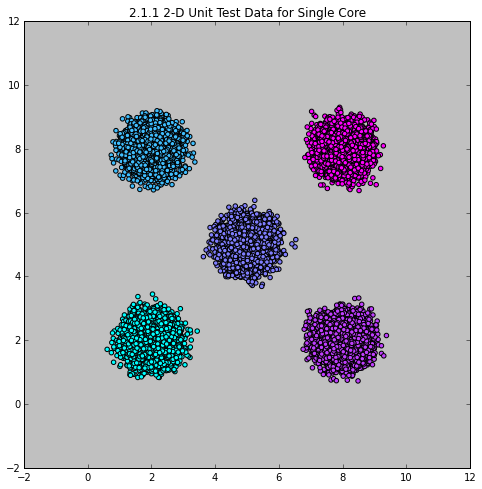

In [2]:
import sklearn.datasets
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

def create_2D_clusters():
    X, y = sklearn.datasets.make_blobs(n_samples=50000, n_features=2, 
                                       centers=[(2, 2), (2, 8), (5, 5), (8, 2), (8, 8)], 
                                       cluster_std=0.35, shuffle=True, random_state=2)
    return X.tolist(), y.tolist()

def plot_2D_data(feature_data, label_data):
    features = np.array(feature_data)
    labels = np.array(label_data)
    # Take all the rows and the first column
    x1 = features[:, 0]
    # Take all the rows and the second column
    x2 = features[:, 1]

    plt.figure(figsize=(8, 8))
    p = plt.subplot(1, 1, 1, axisbg='Silver')
    p.axis((-2, 12, -2, 12))
    p.scatter(x1, x2, c = labels, cmap = "cool")
    plt.title("2.1.1 2-D Unit Test Data for Single Core")
    plt.show() 
    return

X_2d, y_2d = create_2D_clusters()
plot_2D_data(X_2d, y_2d)

#### 3.A.2  Define the Single Core K-Means 2-Dimensional Class

In this section, a class is defined that holds all the functions needed to calculate centroids and to assign each data point to a cluster.  Each function explicitly performs its calculations in each of the two dimensions.

#### TO DO:  Mention that other distance measures can be used.

In [23]:
import numpy as np
import copy


class K_Means_2D():

    
    def initialize_centroids(self, num_clusters):
        centroids = []
        # Randomly set centroids
        for i in range(num_clusters):
            x1 = np.random.uniform(0, 10)
            x2 = np.random.uniform(0, 10)
            centroid_point = [x1, x2]
            centroids.append(centroid_point)
        return centroids

    def get_nearest_centroid(self, x1, x2, centroids):
        distances = []
        # Calculate distance of (x1, x2) from each centroid
        for i in range(len(centroids)):
            c1 = centroids[i][0]
            c2 = centroids[i][1]
            distance = ((x1 - c1)**2 + (x2 - c2)**2)**0.5
            distances.append(distance)
        # Get the nearest centroid
        nearest_centroid_index = -1
        min_dist = float("inf")
        for i in range(len(distances)):
            if distances[i] <= min_dist:
                min_dist = distances[i]
                nearest_centroid_index = i
        return nearest_centroid_index
    
    def calc_new_centroids(self, cluster_assignments, old_centroids):
        sums = {}
        counts = {}
        new_centroids = copy.deepcopy(old_centroids)
        for assignment in cluster_assignments:
            x1 = assignment[0]
            x2 = assignment[1]
            cluster_num = assignment[2]
            if cluster_num not in sums:
                sums[cluster_num] = [x1, x2]
                counts[cluster_num] = 1
            else:
                sums[cluster_num][0] += x1
                sums[cluster_num][1] += x2
                counts[cluster_num] += 1
        for i in range(len(old_centroids)):
            try:
                new_centroids[i][0] = 1.0*sums[i][0]/counts[i]
                new_centroids[i][1] = 1.0*sums[i][1]/counts[i]
            except:
                pass  # If no data points were assigned to the cluster, keep old centroid
        return new_centroids
                
    def time_to_stop(self, old_centroids, new_centroids, iteration, stop_threshold, max_iterations):
        flag = True
        if iteration >= max_iterations:
            flag = True
            print 'Maximum number of iterations reached.'
            return flag
        for i in range(len(old_centroids)):
            if abs(old_centroids[i][0] - new_centroids[i][0]) > stop_threshold:
                flag = False
                return flag
            elif abs(old_centroids[i][1] - new_centroids[i][1]) > stop_threshold:
                flag = False
                return flag
        print 'Stopping threshold reached.  Number of iterations = %d.' %(iteration)
        return flag

    def assign_clusters(self, data, num_clusters, num_features, stop_threshold, max_iterations):
        # Step 0:  Initialize Centroids    
        new_centroids = self.initialize_centroids(num_clusters)
        # Iterate until termination criterion is reached:
        iteration = 1
        while(1):
            # Keep starting centroids to check for convergence
            old_centroids = copy.deepcopy(new_centroids)
            # Step 1: Get nearest centroids
            cluster_assignments = []
            for data_point in data:
                x1 = data_point[0]
                x2 = data_point[1]
                cluster_num = self.get_nearest_centroid(x1, x2, old_centroids)
                cluster_assignments.append([x1, x2, int(cluster_num)])
            # Step 2: Calculate New Centroids
            new_centroids = self.calc_new_centroids(cluster_assignments, old_centroids)
            # Check termination criteria
            if iteration%100 == 0:
                print 'Iteration %d complete.' %(iteration)
            if self.time_to_stop(old_centroids, new_centroids, iteration, stop_threshold, max_iterations):
                break
            # Increment number of iterations
            iteration += 1
        return cluster_assignments, new_centroids

#### 3.A.3 Run 2-Dimensional Unit Test

Try running the unit test multiple times.  One can get very different results depending on the random assignment of the initial centroids.  This will demonstrate the importance of choosing the correct initialization procedure for each particular problem.

In [27]:
km_2d = K_Means_2D()

# RUN K-MEANS ALGORITHM
cluster_assignments_2d, centroids_2d = km_2d.assign_clusters(data=X_2d, num_clusters=5, 
                                                             num_features=2, stop_threshold=0.000001, 
                                                             max_iterations=1000)

Stopping threshold reached.  Number of iterations = 24.


In [28]:
print centroids_2d

[[4.998296197748077, 2.9963374934793676], [7.961122140122422, 7.620755758505287], [2.0030441135764643, 7.998035048127226], [7.6801053235622865, 8.193154647928717], [8.305565934371723, 8.168522579913787]]


#### 3.A.4 Plot Results

This section yields a plot that shows to which cluster each point has been assigned.

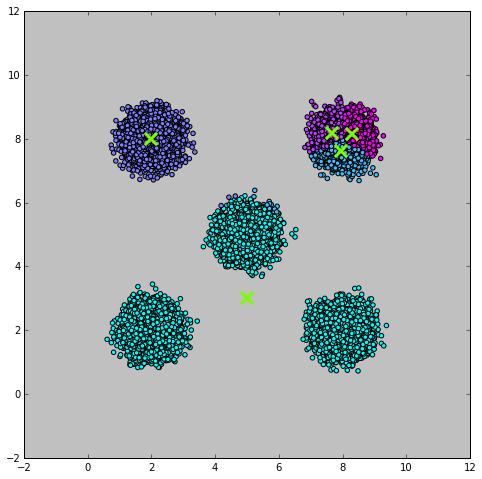

In [29]:
plot_data_x1 = []
plot_data_x2 = []
plot_data_y = []
for i in range(len(cluster_assignments_2d)):
    plot_data_x1.append(cluster_assignments_2d[i][0])
    plot_data_x2.append(cluster_assignments_2d[i][1])
    plot_data_y.append(cluster_assignments_2d[i][2])

centroid_x1 = []
centroid_x2 = []
for i in range(len(centroids_2d)):
    centroid_x1.append(centroids_2d[i][0])
    centroid_x2.append(centroids_2d[i][1])

plt.figure(figsize=(8, 8))
p = plt.subplot(1, 1, 1, axisbg='Silver')
p.axis((-2, 12, -2, 12))
p.scatter(plot_data_x1, plot_data_x2, c = plot_data_y, cmap = "cool")
p.scatter(centroid_x1, centroid_x2, s=150, c='LawnGreen', marker='x', linewidths=3)
plt.show()

#### 3.A.5  Cluster Quality Table

This section prints a table showing into which cluster the points in each original class fall.  From this table, one can assess how well the k-means algorithm clustered the data points.  Check:  Are all the points from one class in the same cluster?  Does each cluster contain points from only one class?

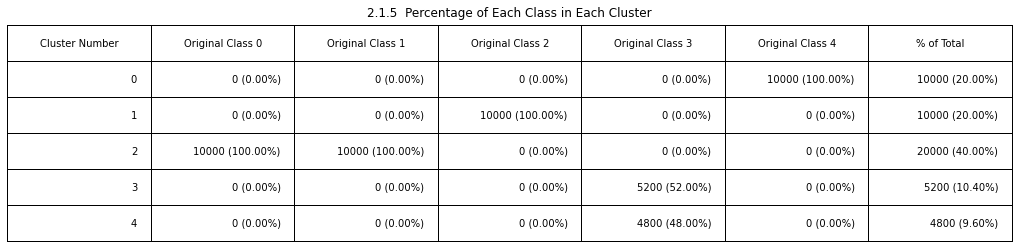

In [7]:
# Calculate data for table
clusters = []
for i in range(len(cluster_assignments_2d)):
    clusters.append(cluster_assignments_2d[i][-1])

cluster_class = zip(clusters, y_2d)
counts = [[0]*5, [0]*5, [0]*5, [0]*5, [0]*5]
for i in range(len(cluster_class)):
    a = cluster_class[i][0]
    b = cluster_class[i][1]
    counts[a][b] += 1

table_data = []
for i in range(5):
    class_percentages = [i]
    for j in range(5):
        class_percentages.append('%i (%.2f%s)' %(counts[i][j], counts[i][j]*1.0/10000*100, '%'))
    class_percentages.append('%i (%.2f%s)' %(sum(counts[i]),sum(counts[i])*1.0/50000*100,'%'))
    table_data.append(class_percentages)

# Print the cluster and % of each class in that cluster in a table
col_labels = ["Cluster Number", "Original Class 0", "Original Class 1", 
              "Original Class 2", "Original Class 3", "Original Class 4",
              "% of Total"]
plot_table = plt.subplot()
ax1 = plt.axes(frameon=False)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
printed_table = plt.table(cellText=table_data, colLabels=col_labels, loc='center')
printed_table.scale(3,3)
plt.title('2.1.5  Percentage of Each Class in Each Cluster', y = 1)
plt.show()

#### 3.A.6  Determining the Optimal Number of Clusters:  The Elbow Curve

In [ ]:
### TO DO:  Run the code multiple times with a different number of clusters.
### Plot the external quality measure for each k and see where the curve bends.
### Use code from Python Machine Learning book.

### 3.B An N-Dimensional Example <a name="3.B"></a>
[Back to Table of Contents](#TOC)

Now we expand our code to more than two dimensions.  For k-means, we work in vector format.  
    
In N dimensions, the Euclidean distance is given by

$ d(\textbf{x}, \textbf{c}) = \sqrt{\displaystyle\sum_{i=1}^{N}{(x_i - c_i)^2}} $
  
As in the 2-dimensional case, one then assigns the point to the cluster $C$ with the minimum distance:
    
$ C(x) = argmin(d_1, ..., d_K)$
  
New centroids are calculated by averaging the values of the points in each cluster.  For cluster $C^k$, each element of the new centroid $c^k_i$ is given by

$ c^k_i = \frac{1}{\left|C^k\right|} \displaystyle\sum_{x \in C^k}{x_i} $  
   
where $\left|C^k\right|$ is the number of points in cluster $C^k$.



#### 3.B.1  Create N-Dimensional Unit Test Dataset
This section creates a generic dataset to use in an N-dimensional unit test using a single core.

In [3]:
def create_ND_clusters(num_clusters, num_features):
    X, y = sklearn.datasets.make_blobs(n_samples=50000, n_features=num_features, centers=num_clusters, 
                                       cluster_std=1.0, center_box=(0.0, 10.0), shuffle=True, 
                                       random_state=2)
    return X, y

num_clusters = 5
num_dimensions = 100
X_Nd, y_Nd = create_ND_clusters(num_clusters, num_dimensions)

#### 3.B.2  Define the Single Core K-Means N-Dimensional Class

In this section, a class is defined that holds all the functions needed to calculate centroids and to assign each data point to a cluster.  Each function performs its calculations on vectors using numpy.

In [9]:
import copy
import numpy as np


class K_Means_ND():

    def __init__(self, max_iterations=100, stop_threshold=0.001):
        self.max_iterations = max_iterations
        self.stop_threshold = stop_threshold
        self.centroids = []
        self.cluster_assignments = []
        self.num_clusters = 1
        self.num_features = 1
        return
    
    def initialize_centroids(self):
        self.centroids = np.random.uniform(low=0.0, high=10.0, size=(self.num_clusters, self.num_features))
        return

    def get_nearest_centroid(self, X):
        centroids = np.array(self.centroids)
        self.cluster_assignments = []
        for i in range(len(X)):
            data_point = np.array(X[i])
            # Calculate the distance of this data point from each centroid
            distances = np.sqrt(np.sum(np.square(np.subtract(data_point, centroids)), axis=1))              
            # Get the nearest centroid for this data point
            nearest_centroid_index = np.argmin(distances)
            self.cluster_assignments.append(nearest_centroid_index)
        return
    
    #####  TO DO:
    def get_nearest_centroid_compact(self, X, distance_function):
        
        return
    
    def calc_new_centroids(self, X):
        sums = np.array([[0.0]*self.num_features]*self.num_clusters)
        counts = np.array([0]*self.num_clusters)
        for i in range(len(X)):
            data_point = np.array(X[i])
            sums[self.cluster_assignments[i]] += data_point
            counts[self.cluster_assignments[i]] += 1
        for i in range(self.num_clusters):
            if counts[i] != 0:
                self.centroids[i] = 1.0*sums[i]/counts[i]
            else:
                pass  # If no data points were assigned to the cluster, keep old centroid
        return
                
    def time_to_stop(self, old_centroids, iteration):
        flag = True
        if iteration >= self.max_iterations:
            flag = True
            print 'Maximum number of iterations reached.'
            return flag
        old_centroids = np.array(old_centroids)
        new_centroids = np.array(self.centroids)
        diffs = np.absolute(np.subtract(old_centroids, new_centroids))
        if np.amax(diffs) < self.stop_threshold:
            flag = True
            print 'Stopping threshold reached.  Number of iterations = %d.' %(iteration)
        else:
            flag = False
        return flag
    
    def assign_clusters(self, X, y=None, num_clusters=1):
        self.num_clusters = num_clusters
        self.num_features = len(X[0])
        # Step 0:  Initialize Centroids    
        self.initialize_centroids()
        # Iterate until termination criterion is reached:
        iteration = 1
        while(1):
            # Keep starting centroids to check for convergence
            old_centroids = copy.deepcopy(self.centroids[:])
            # Step 1: Get nearest centroids
            self.get_nearest_centroid(X)
            # Step 2: Calculate New Centroids
            self.calc_new_centroids(X)
            # Check termination criteria
            if iteration%100 == 0:
                print 'Iteration %d complete.' %(iteration)
            if self.time_to_stop(old_centroids, iteration):
                break
            # Increment number of iterations
            iteration += 1
        return
    
    def centroids(self):
        return self.centroids
    
    def cluster_assignments(self):
        return cluster_assignments

#### 3.B.3  Run N-Dimensional Unit Test

Again, try running the unit test multiple times.  One can get very different results depending on the random assignment of the initial centroids.  This will demonstrate the importance of choosing the correct initialization procedure for each particular problem.

In [10]:
# Create a k-means N-dimensional class instance
kmeans_Nd = K_Means_ND(max_iterations=250, stop_threshold=0.000001)

# Run K-Means Algorithm
kmeans_Nd.assign_clusters(X=X_Nd, num_clusters=5)

# Get centroids
centroids_Nd = kmeans_Nd.centroids

# Get cluster assignments
cluster_assignments_Nd = kmeans_Nd.cluster_assignments

Stopping threshold reached.  Number of iterations = 3.


#### 3.B.4  Cluster Quality Table for N-Dimensional Data

This section prints a table showing into which cluster the points in each original class fall.  From this table, one can assess how well the k-means algorithm clustered the data points.  Check:  Are all the points from one class in the same cluster?  Does each cluster contain points from only one class?

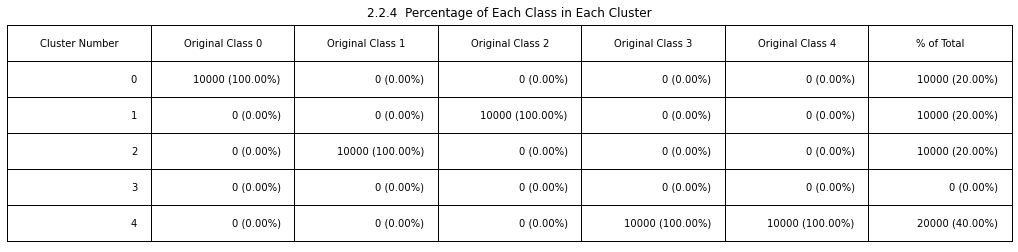

In [11]:
# Calculate and format data for table
cluster_class = zip(cluster_assignments_Nd, y_Nd)
counts = [[0]*5, [0]*5, [0]*5, [0]*5, [0]*5]
for i in range(len(cluster_class)):
    a = cluster_class[i][0]
    b = cluster_class[i][1]
    counts[a][b] += 1

table_data = []
for i in range(5):
    class_percentages = [i]
    for j in range(5):
        class_percentages.append('%i (%.2f%s)' %(counts[i][j], counts[i][j]*1.0/10000*100, '%'))
    class_percentages.append('%i (%.2f%s)' %(sum(counts[i]),sum(counts[i])*1.0/50000*100,'%'))
    table_data.append(class_percentages)

# Print the cluster and % of each class in that cluster in a table
col_labels = ["Cluster Number", "Original Class 0", "Original Class 1", 
              "Original Class 2", "Original Class 3", "Original Class 4",
              "% of Total"]
plot_table = plt.subplot()
ax1 = plt.axes(frameon=False)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
printed_table = plt.table(cellText=table_data, colLabels=col_labels, loc='center')
printed_table.scale(3,3)
plt.title('2.2.4  Percentage of Each Class in Each Cluster', y = 1)
plt.show()

### 3.C An N-Dimensional Example With Dense Data <a name="3.C"></a>
[Back to Table of Contents](#TOC)

Dense data is when there is an entry in every column of the data.  Often with dense data, the entries refer to counts or are indicator variables (0's or 1's), such as when one is counting the number of occurrences of a word or indicating whether a word appears in a document.

Usually with dense data, most of the entries are 0's.  Example:  [0, 1, 0, 0, 0, 0, ..., 0, 1, 0].  

#### 3.C.1  Create N-Dimensional Unit Test Dataset With Dense Data

This section creates a generic dense dataset to use in a 4-dimensional unit test using a single core.

In [15]:
import numpy as np

def create_ND_clusters_dense(num_samples):
    X = []
    y = []
    for i in range(num_samples):
        X.append([0, 0, 0, 0])
        y.append(0)
        X.append([1, 0, 0, 0])
        y.append(1)
        X.append([0, 1, 0, 0])
        y.append(2)
        X.append([0, 0, 1, 0])
        y.append(3)
        X.append([0, 0, 0, 1])
        y.append(4)
        X.append([1, 1, 0, 0])
        y.append(5)
        X.append([1, 0, 1, 0])
        y.append(6)
        X.append([1, 0, 0, 1])
        y.append(7)
        X.append([0, 1, 1, 0])
        y.append(8)
        X.append([0, 1, 0, 1])
        y.append(9)
        X.append([0, 0, 1, 1])
        y.append(10)
        X.append([1, 1, 1, 0])
        y.append(11)
        X.append([1, 1, 0, 1])
        y.append(12)
        X.append([1, 0, 1, 1])
        y.append(13)
        X.append([0, 1, 1, 1])
        y.append(14)
        X.append([1, 1, 1, 1])
        y.append(15)
    X = np.array(X)
    y = np.array(y)
    np.random.seed(10)
    shuffle = np.random.permutation(np.arange(len(X)))
    X, y = X[shuffle], y[shuffle]    
    return X.tolist(), y.tolist()

num_classes = 16
num_samples_per_class = 1000

X_Nd_dense, y_Nd_dense = create_ND_clusters_dense(num_samples=num_samples_per_class)

#### 3.C.2  Define the Single Core K-Means N-Dimensional Class For Dense Data

In this section, a class is defined that holds all the functions needed to calculate centroids and to assign each data point to a cluster.  Each function performs its calculations on vectors using numpy.  It is identical to the class for regular N-dimensional data.

In [16]:
import numpy as np


class K_Means_ND_dense():

    
    def initialize_centroids(self, num_clusters, num_features):
        centroids = np.random.uniform(low=0.0, high=1.0, size=(num_clusters, num_features))
        return centroids

    def get_nearest_centroid(self, data_point, centroids):
        data_point = np.array(data_point)
        centroids = np.array(centroids)
        distances = np.sqrt(np.sum(np.square(np.subtract(data_point, centroids)), axis=1))              
        # Get the nearest centroid
        nearest_centroid_index = np.argmin(distances)
        return nearest_centroid_index
    
    def calc_new_centroids(self, cluster_assignments, old_centroids):
        sums = {}
        counts = {}
        new_centroids = np.array(old_centroids[:])
        for assignment in cluster_assignments:
            cluster_num = assignment[-1]
            data_point = np.array(assignment[:-1])
            if cluster_num not in sums:
                sums[cluster_num] = data_point
                counts[cluster_num] = 1
            else:
                sums[cluster_num] += data_point
                counts[cluster_num] += 1
        for i in range(len(old_centroids)):
            try:
                new_centroids[i] = 1.0*sums[i]/counts[i]
            except:
                pass  # If no data points were assigned to the cluster, keep old centroid
        return new_centroids
                

    def time_to_stop(self, old_centroids, new_centroids, iteration, stop_threshold, max_iterations):
        flag = True
        if iteration >= max_iterations:
            flag = True
            print 'Maximum number of iterations reached.'
            return flag
        old_centroids = np.array(old_centroids)
        new_centroids = np.array(new_centroids)
        diffs = np.absolute(np.subtract(old_centroids, new_centroids))
        if np.amax(diffs) < stop_threshold:
            flag = True
            print 'Stopping threshold reached.  Number of iterations = %d.' %(iteration)
        else:
            flag = False
        return flag
    
    def assign_clusters(self, data, num_clusters, num_features, stop_threshold, max_iterations):
        # Step 0:  Initialize Centroids    
        new_centroids = self.initialize_centroids(num_clusters, num_features)
        # Iterate until termination criterion is reached:
        iteration = 1
        while(1):
            # Keep starting centroids to check for convergence
            old_centroids = new_centroids[:]
            # Step 1: Get nearest centroids
            cluster_assignments = []
            for data_point in data:
                cluster_info = data_point[:]
                cluster_num = self.get_nearest_centroid(data_point, old_centroids)
                cluster_info = np.append(cluster_info, cluster_num)
                cluster_assignments.append(cluster_info)
            # Step 2: Calculate New Centroids
            new_centroids = self.calc_new_centroids(cluster_assignments, old_centroids)
            # Check termination criteria
            if iteration%100 == 0:
                print 'Iteration %d complete.' %(iteration)
            if self.time_to_stop(old_centroids, new_centroids, iteration, stop_threshold, max_iterations):
                break
            # Increment number of iterations
            iteration += 1
        return cluster_assignments, new_centroids

#### 3.C.3   Run N-Dimensional Unit Test on Dense Data

Again, try running the unit test multiple times.  One can get very different results depending on the random assignment of the initial centroids.  This will demonstrate the importance of choosing the correct initialization procedure for each particular problem.

In [27]:
km_Nd_dense = K_Means_ND_dense()

# RUN K-MEANS ALGORITHM
cluster_assignments_Nd_dense, centroids_Nd_dense = km_Nd_dense.assign_clusters(data=X_Nd_dense, 
                                                                               num_clusters=16, 
                                                                               num_features=4, 
                                                                               stop_threshold=0.000001, 
                                                                               max_iterations = 1000)

Stopping threshold reached.  Number of iterations = 2.


#### 3.C.4  Cluster Quality Table for N-Dimensional Dense Data

This section prints a table showing into which cluster the points in each original class fall.  From this table, one can assess how well the k-means algorithm clustered the data points.  Check:  Are all the points from one class in the same cluster?  Does each cluster contain points from only one class?

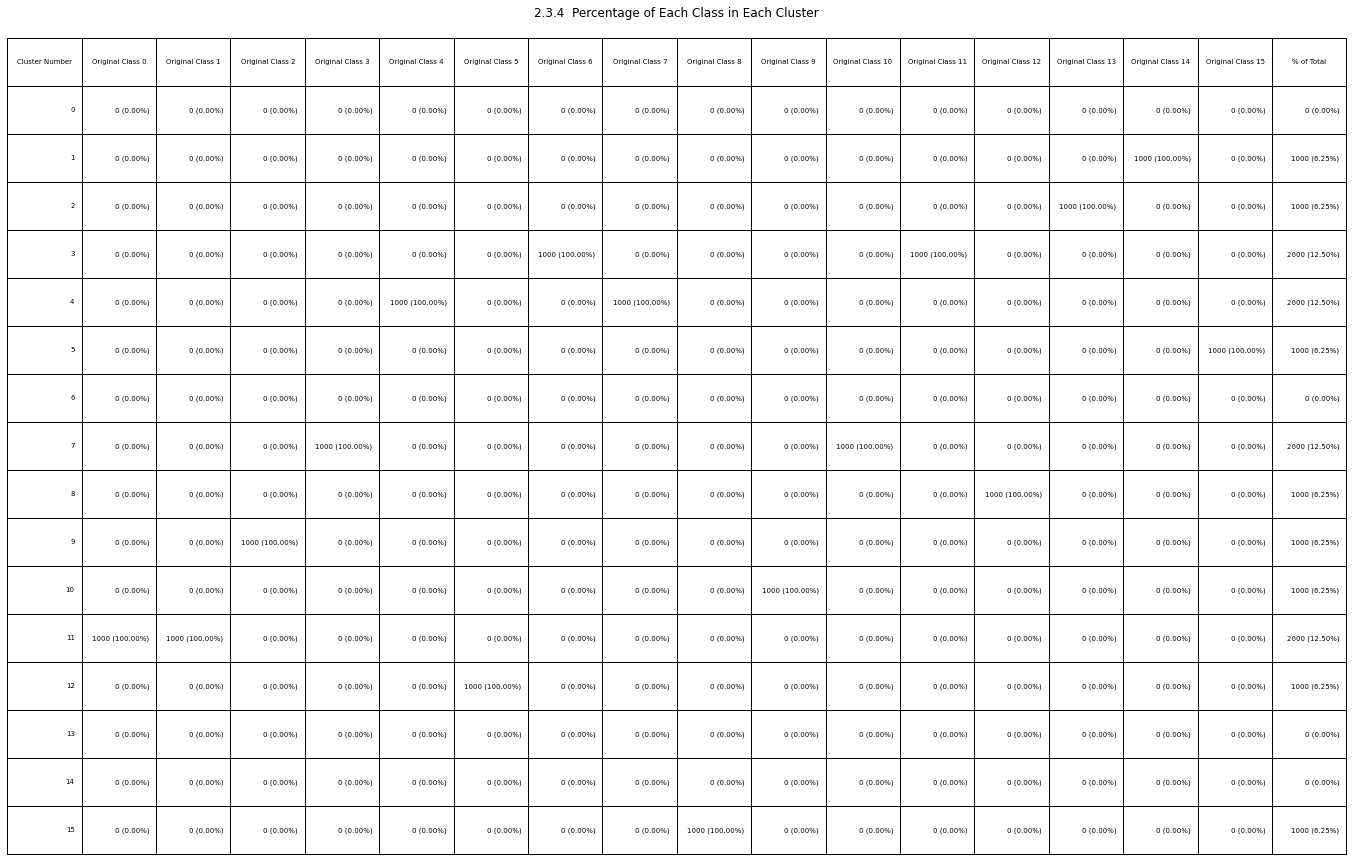

In [28]:
from matplotlib import pyplot as plt

% matplotlib inline

# Calculate data for table
clusters = []
for i in range(len(cluster_assignments_Nd_dense)):
    clusters.append(int(cluster_assignments_Nd_dense[i][-1]))
cluster_class = zip(clusters, y_Nd_dense)

counts = []
for i in range(16):
    counts.append([0]*16)

for i in range(len(cluster_class)):
    a = cluster_class[i][0]
    b = cluster_class[i][1]
    counts[a][b] += 1

table_data = []
for i in range(16):
    class_percentages = [i]
    for j in range(16):
        class_percentages.append('%i (%.2f%s)' %(counts[i][j], counts[i][j]*1.0/num_samples_per_class*100, '%'))
    class_percentages.append('%i (%.2f%s)' %(sum(counts[i]),sum(counts[i])*1.0/(num_samples_per_class*num_classes)*100,'%'))
    table_data.append(class_percentages)

# Print the cluster and % of each class in that cluster in a table
col_labels = ["Cluster Number", "Original Class 0", "Original Class 1", 
              "Original Class 2", "Original Class 3", "Original Class 4",
              "Original Class 5", "Original Class 6", "Original Class 7",
              "Original Class 8", "Original Class 9", "Original Class 10",
              "Original Class 11", "Original Class 12", "Original Class 13",
              "Original Class 14", "Original Class 15", "% of Total"]
plot_table = plt.subplot()
ax1 = plt.axes(frameon=False)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
printed_table = plt.table(cellText=table_data, colLabels=col_labels, loc='center')
printed_table.scale(4,4)
plt.title('2.3.4  Percentage of Each Class in Each Cluster', y = 2.4)
plt.show()

### 3.D  An N-Dimensional Example With Sparse Data <a name="3.D"></a>
[Back to Table of Contents](#TOC)

Sparse data is a compact way to express dense data.  Sparse data only has entries for columns that are non-zero.   
   
For example, the dense data vector of counts [0, 0, 5, 2, 0, 0, 3, 0, 0] can be expressed as a sparse dictionary, {2: 5, 3: 2, 6: 3}, listing the columns and their counts that are non-zero.  The dense data vector of indicator variables [0, 0, 1, 1, 0, 0, 1, 0, 0] can be expressed as the sparse list [2, 3, 6], listing the columns that have non-zero entries.

**ADD NOTE:  THESE ARE BINARY VECTORS **

#### 3.D.1  Create N-Dimensional Unit Test Dataset With Sparse Data

This section creates a generic sparse dataset to use in a 4-dimensional unit test using a single core.

In [29]:
import numpy as np

def create_ND_clusters_sparse(num_samples):
    X = []
    y = []
    for i in range(num_samples):
        X.append([0])
        y.append(0)
        X.append([1])
        y.append(1)
        X.append([2])
        y.append(2)
        X.append([3])
        y.append(3)
        X.append([0, 1])
        y.append(4)
        X.append([0, 2])
        y.append(5)
        X.append([0, 3])
        y.append(6)
        X.append([1, 2])
        y.append(7)
        X.append([1, 3])
        y.append(8)
        X.append([2, 3])
        y.append(9)
        X.append([0, 1, 2])
        y.append(10)
        X.append([0, 1, 3])
        y.append(11)
        X.append([0, 2, 3])
        y.append(12)
        X.append([1, 2, 3])
        y.append(13)
        X.append([0, 1, 2, 3])
        y.append(14)
    X = np.array(X)
    y = np.array(y)
    np.random.seed(10)
    shuffle = np.random.permutation(np.arange(len(X)))
    X, y = X[shuffle], y[shuffle]    
    return X.tolist(), y.tolist()

num_classes = 15
num_samples_per_class = 1000

X_Nd_sparse, y_Nd_sparse = create_ND_clusters_sparse(num_samples=num_samples_per_class)

#### 3.D.2  Define the Single Core K-Means N-Dimensional Class For Sparse Data

In this section, a class is defined that holds all the functions needed to calculate centroids and to assign each data point to a cluster.  Each function performs its calculations on vectors using numpy.  We adapt the N-dimensional code so that we do not have to expand out the sparse vectors.

In [30]:
import numpy as np
import copy

class K_Means_ND_sparse():
    
    
    def initialize_centroids(self, num_clusters, num_features):
        centroids = np.random.uniform(low=0.0, high=1.0, size=(num_clusters, num_features))
        return centroids
    
    def get_nearest_centroid(self, sparse_vector, centroids):
        # Define function to calculate difference between a sparse vector and a centroid
        def calc_difference(centroid):
            diff = copy.deepcopy(centroid)
            for i in range(len(sparse_vector)):
                diff[int(sparse_vector[i])] -= 1
            return diff
        # Calculate Euclidean distance between sparse vectors and centroids
        distances = np.sqrt(np.sum(np.square(np.array(map(calc_difference, centroids))), axis=1))
        # Get the nearest centroid
        nearest_centroid_index = np.argmin(distances)
        return nearest_centroid_index
    
    def calc_new_centroids(self, cluster_assignments, old_centroids):
        # Sum and count data points by cluster
        sums = {}
        counts = {}
        for assignment in cluster_assignments:
            cluster_num = assignment[-1]
            sparse_vector = assignment[:-1]
            if cluster_num not in sums:
                sums[cluster_num] = {}
                for i in range(len(sparse_vector)):
                    sums[cluster_num][sparse_vector[i]] = 1
                counts[cluster_num] = 1
            else:
                for i in range(len(sparse_vector)):
                    if sparse_vector[i] in sums[cluster_num]:
                        sums[cluster_num][sparse_vector[i]] += 1
                    else:
                        sums[cluster_num][sparse_vector[i]] = 1
                counts[cluster_num] += 1
        # Calculate new centroids
        new_centroids = copy.deepcopy(old_centroids)
        for cluster_num in range(len(old_centroids)):
            if cluster_num in sums:
                new_centroids[cluster_num] = [0]*len(old_centroids[0])
                for column, count in sums[cluster_num].items():
                    new_centroids[cluster_num][column] = 1.0*count/counts[cluster_num]
        return new_centroids
                
    def time_to_stop(self, old_centroids, new_centroids, iteration, stop_threshold, max_iterations):
        flag = False
        if iteration >= max_iterations:
            flag = True
            print 'Maximum number of iterations reached.'
            return flag
        old_centroids = np.array(old_centroids)
        new_centroids = np.array(new_centroids)
        diffs = np.absolute(np.subtract(old_centroids, new_centroids))
        if np.amax(diffs) < stop_threshold:
            flag = True
            print 'Stopping threshold reached.  Number of iterations = %d.' %(iteration)
        else:
            flag = False
        return flag
        
    def run_k_means(self, data, num_clusters, num_features, stop_threshold, max_iterations):
        # Step 0:  Initialize Centroids    
        new_centroids = self.initialize_centroids(num_clusters, num_features)
        # Iterate until termination criterion is reached:
        iteration = 1
        while(1):
            # Keep starting centroids to check for convergence
            old_centroids = copy.deepcopy(new_centroids)
            # Step 1: Get nearest centroids
            cluster_assignments = []
            for sparse_vector in data:
                cluster_num = self.get_nearest_centroid(sparse_vector, old_centroids)
                cluster_info = sparse_vector[:]
                cluster_info = np.append(cluster_info, cluster_num)
                cluster_assignments.append(cluster_info)
            # Step 2: Calculate New Centroids
            new_centroids = self.calc_new_centroids(cluster_assignments, old_centroids)
            # Check termination criteria
            if iteration % 100 == 0:
                print 'Iteration %d complete.' %(iteration)
            if self.time_to_stop(old_centroids, new_centroids, iteration, stop_threshold, max_iterations):
                break
            # Increment number of iterations
            iteration += 1
        return cluster_assignments, new_centroids

#### 3.D.3  Run N-Dimensional Unit Test on Sparse Data

Again, try running the unit test multiple times.  One can get very different results depending on the random assignment of the initial centroids.  This will demonstrate the importance of choosing the correct initialization procedure for each particular problem.

In [31]:
km_Nd_sparse = K_Means_ND_sparse()

# RUN K-MEANS ALGORITHM
cluster_assignments_Nd_sparse, centroids_Nd_sparse = km_Nd_sparse.run_k_means(data=X_Nd_sparse, 
                                                                              num_clusters=15, 
                                                                              num_features=4, 
                                                                              stop_threshold=0.001, 
                                                                              max_iterations = 1000)

Stopping threshold reached.  Number of iterations = 3.


#### 3.D.4  Cluster Quality Table for N-Dimensional Sparse Data

This section prints a table showing into which cluster the points in each original class fall.  From this table, one can assess how well the k-means algorithm clustered the data points.  Check:  Are all the points from one class in the same cluster?  Does each cluster contain points from only one class?

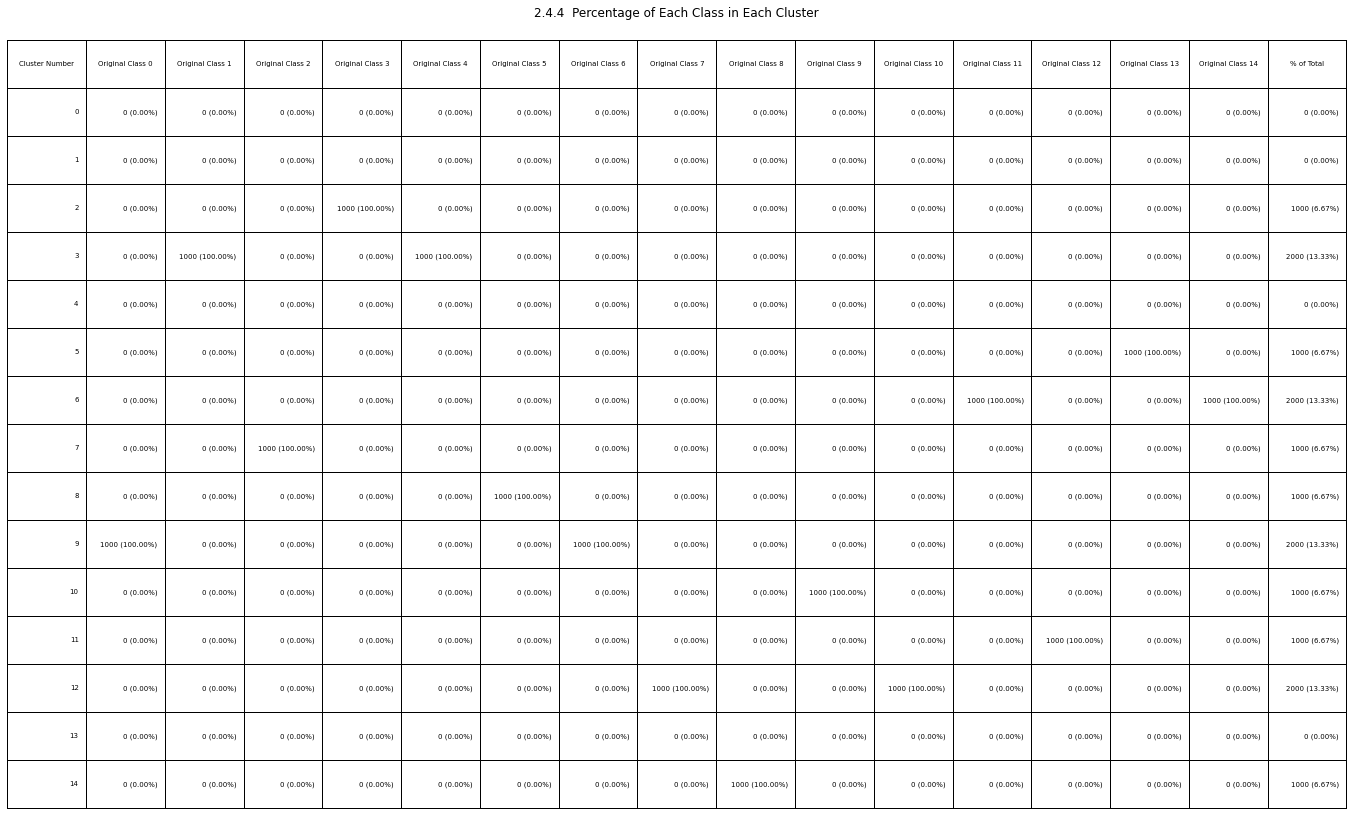

In [32]:
import matplotlib.pyplot as plt

%matplotlib inline

# Calculate data for table
clusters = []
for i in range(len(cluster_assignments_Nd_sparse)):
    clusters.append(int(cluster_assignments_Nd_sparse[i][-1]))
cluster_class = zip(clusters, y_Nd_sparse)

counts = []
for i in range(15):
    counts.append([0]*15)

for i in range(len(cluster_class)):
    a = cluster_class[i][0]
    b = cluster_class[i][1]
    counts[a][b] += 1

table_data = []
for i in range(15):
    class_percentages = [i]
    for j in range(15):
        class_percentages.append('%i (%.2f%s)' %(counts[i][j], counts[i][j]*1.0/num_samples_per_class*100, '%'))
    class_percentages.append('%i (%.2f%s)' %(np.sum(counts[i]),np.sum(counts[i])*1.0/(num_classes*num_samples_per_class)*100,'%'))
    table_data.append(class_percentages)

# Print the cluster and % of each class in that cluster in a table
col_labels = ["Cluster Number", "Original Class 0", "Original Class 1", 
              "Original Class 2", "Original Class 3", "Original Class 4",
              "Original Class 5", "Original Class 6", "Original Class 7",
              "Original Class 8", "Original Class 9", "Original Class 10",
              "Original Class 11", "Original Class 12", "Original Class 13",
              "Original Class 14", "% of Total"]
plot_table = plt.subplot()
ax1 = plt.axes(frameon=False)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
printed_table = plt.table(cellText=table_data, colLabels=col_labels, loc='center')
printed_table.scale(4,4)
plt.title('2.4.4  Percentage of Each Class in Each Cluster', y = 2.3)
plt.show()

## 4. The Multi-Core Solution <a name="4"></a>
[Back to Table of Contents](#TOC)

The part of the K-means iterative process that is most computing-intensive is the step of calculating the new centroids.  This is the part that one wants to distribute over multiple cores using the MapReduce framework. Calculating the new centroids means calculating averages.  This requires summing and counting, which is easily distributed.  

Assigning points to the nearest centroid is done in the mapper.  The mapper then emits the assigned cluster number of the data point as the key.  The value emitted includes the true class of the data point, the data point, and a count of 1.  

The summing and counting takes place in the reducer by cluster number (i.e. the mapper key).  The reducer then performs the final division to get the means along each dimension for each cluster.  The reducer emits the cluster number as the key.  The value emitted includes the counts of the number of each class in the cluster, as well as the centroid of the cluster.

### 4.A A 2-Dimensional Example <a name="4.A"></a>
[Back to Table of Contents](#TOC)

This section shows how to distribute the assignment of each data point to a cluster, calculate the new centroids, and iterate through this two-step process using MRJob in two dimensions.

#### 4.A.1 Create 2-Dimensional Unit Test Dataset

This section creates the dataset for the 2-dimensional distributed unit test.

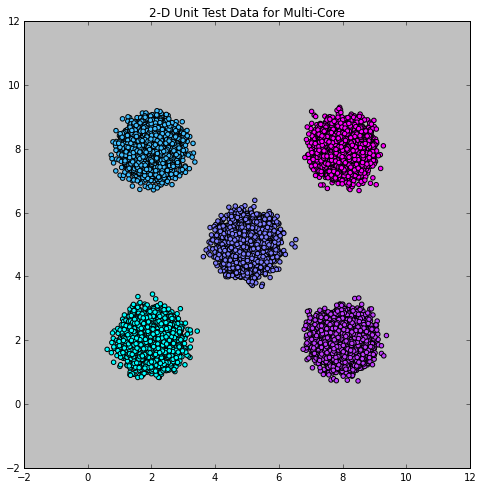

In [33]:
import sklearn.datasets
import numpy as np
from matplotlib import pyplot as plt
import csv

%matplotlib inline

def create_2D_clusters():
    X, y = sklearn.datasets.make_blobs(n_samples=50000, n_features=2, 
                                       centers=[(2, 2), (2, 8), (5, 5), (8, 2), (8, 8)], 
                                       cluster_std=0.35, shuffle=True, random_state=2)
    return X.tolist(), y.tolist()

def plot_2D_data(feature_data, label_data):
    features = np.array(feature_data)
    labels = np.array(label_data)
    x1 = features[:, 0]
    x2 = features[:, 1]

    plt.figure(figsize=(8, 8))
    p = plt.subplot(1, 1, 1, axisbg='Silver')
    p.axis((-2, 12, -2, 12))
    p.scatter(x1, x2, c = labels, cmap = "cool")
    plt.title("2-D Unit Test Data for Multi-Core")
    plt.show() 
    return

X_2d_multi, y_2d_multi = create_2D_clusters()
plot_2D_data(X_2d_multi, y_2d_multi)
data_2d_multi = []
for i in range(len(y_2d_multi)):
    sample = []
    sample.append(y_2d_multi[i])
    sample.append(X_2d_multi[i][0])
    sample.append(X_2d_multi[i][1])
    data_2d_multi.append(sample)

with open('./data_2d_multi.txt', 'wb') as outfile:
    data_writer = csv.writer(outfile)
    for sample in data_2d_multi:
        data_writer.writerow(sample)

#### 4.A.2  Define the Multi-Core K-Means 2-Dimensional MRJob Class

This section shows how to use MRJob to distribute the k-means two-step algorithm in two dimensions.  A Python file is created that includes the definition of an MRJob class.  In the MRJob class, the mapper is first initialized by loading the starting centroids.  The mapper itself then uses the function 'get_nearest_centroid' to assign each data point to a cluster.  Finally, the reducer averages all the points in each cluster to get the new centroids.
  
The centroids are stored in a temporary folder: '/tmp/Centroids.txt'

NOTE:  Your MRJob will not work without including lines 70 and 71!   

In [34]:
%%writefile K_Means_2D_Multi_Core.py
import csv
import numpy as np
from mrjob.job import MRJob
from mrjob.step import MRStep

def get_nearest_centroid(x1, x2, centroids):
    distances = []
    # Calculate distance of (x1, x2) from each centroid
    for i in range(len(centroids)):
        c1 = centroids[i][0]
        c2 = centroids[i][1]
        distance = ((x1 - c1)**2 + (x2 - c2)**2)**0.5
        distances.append(distance)
    # Get the nearest centroid
    nearest_centroid_index = -1
    min_dist = float("inf")
    for i in range(len(distances)):
        if distances[i] <= min_dist:
            min_dist = distances[i]
            nearest_centroid_index = i
    return nearest_centroid_index


class K_Means_2D_Multi_Core(MRJob):

    
    def steps(self):
        return [
            MRStep(mapper_init = self.mapper_init, 
                   mapper = self.mapper,
                   reducer=self.reducer)
               ]
    
    def mapper_init(self):
        # Load initial centroids from file
        K_Means_2D_Multi_Core.centroids = []
        with open('/tmp/Centroids.txt', 'rb') as infile:
            data_reader = csv.reader(infile)
            for line in data_reader:
                centroid = [float(x) for x in line]
                self.centroids.append(centroid)
        K_Means_2D_Multi_Core.k = len(self.centroids)
        K_Means_2D_Multi_Core.num_features = len(self.centroids[0])
        K_Means_2D_Multi_Core.classes = []
        
    # Load data and output the nearest centroid index, true class, data point, and count
    def mapper(self, _, line):
        inputs = (map(float,line.split(',')))
        if inputs[0] not in self.classes:
            self.classes.append(inputs[0])
        x1 = inputs[1]
        x2 = inputs[2]
        yield int(get_nearest_centroid(x1, x2, self.centroids)), (int(inputs[0]), [x1, x2], 1)
    
    #Aggregate sums for each cluster and then calculate the new centroids
    def reducer(self, cluster, inputdata):
        class_count = [0]*len(self.classes)
        centroid = [0, 0]
        num = 0
        for true_class, sum_points, n in inputdata:
            class_count[true_class] += n
            num += n
            centroid[0] += sum_points[0]
            centroid[1] += sum_points[1]
        centroid[0] /= num
        centroid[1] /= num
        yield cluster, (class_count, centroid)

if __name__ == '__main__':
    K_Means_2D_Multi_Core.run()

Overwriting K_Means_2D_Multi_Core.py


#### 4.A.3 Run 2-Dimensional MRJob Class Locally Through Python Driver

In this section, the MRJob class is imported from the Python file created above.  The section also contains the definition of a function to create initial centroids and a function defining the stopping criteria for the k-means algorithm.  It then runs the steps of the k-means algorithm:  It initializes the centroids, and then it iterates through assigning data points to clusters and calculating new centroids, using mrjob_runner.make_runner to run the mapper and reducer.  The output of the MRJob is streamed so that the new centroids can be compared to the old centroids to see if the stopping criteria have been met.

In [35]:
%reload_ext autoreload
%autoreload 2

import csv
import numpy as np
import copy    
from K_Means_2D_Multi_Core import K_Means_2D_Multi_Core

# Initialize parameters
num_features = 2
num_classes = 5
num_samples = 50000
num_clusters = 5

def initialize_centroids(num_clusters):
    centroids = []
    # Randomly set centroids
    for i in range(num_clusters):
        x1 = np.random.uniform(0, 10)
        x2 = np.random.uniform(0, 10)
        centroid = [x1, x2]
        centroids.append(centroid)
    with open('/tmp/Centroids.txt', 'wb') as outfile:
        data_writer = csv.writer(outfile)
        for centroid in centroids:
            data_writer.writerow(centroid)
    return centroids

def time_to_stop(old_centroids, new_centroids, iteration, stop_threshold, max_iterations):
    flag = True
    if iteration >= max_iterations:
        flag = True
        print 'Maximum number of iterations reached.'
        return flag
    for i in range(len(old_centroids)):
        if abs(old_centroids[i][0] - new_centroids[i][0]) > stop_threshold:
            flag = False
            return flag
        if abs(old_centroids[i][1] - new_centroids[i][1]) > stop_threshold:
            flag = False
            return flag
    print 'Stopping threshold reached.  Number of iterations = %d.' %(iteration)
    return flag

# RUN K-MEANS ALGORITHM
# Generate initial centroids and write to file
new_centroids = initialize_centroids(num_clusters=num_clusters)

# Define MRJob 
mr_job = K_Means_2D_Multi_Core(args=['data_2d_multi.txt'])

# Update centroids iteratively
iteration = 1
while(1):
    # Keep starting centroids to check for convergence
    old_centroids = new_centroids[:]
    class_counts = [[0]*num_classes]*num_clusters
    # Run the MRJob
    with mr_job.make_runner() as runner: 
        runner.run()
        for line in runner.stream_output():
            key, value =  mr_job.parse_output_line(line)
            class_counts[key] = value[0]
            new_centroids[key] = value[1]
    # Write new centroids to file
    with open('/tmp/Centroids.txt', 'wb') as outfile:
            data_writer = csv.writer(outfile)
            for centroid in new_centroids:
                data_writer.writerow(centroid)
    # Check termination criteria
    if iteration%100 == 0:
        print 'Iteration %d complete.' %(iteration)
    if(time_to_stop(old_centroids, new_centroids, iteration, 0.000001, 500)):
        break
    iteration += 1

Stopping threshold reached.  Number of iterations = 35.


#### 4.A.4 Plot Results

This section yields a plot that shows to which cluster each point has been assigned.  It imports and uses the 'get_nearest_centroid' function from above.

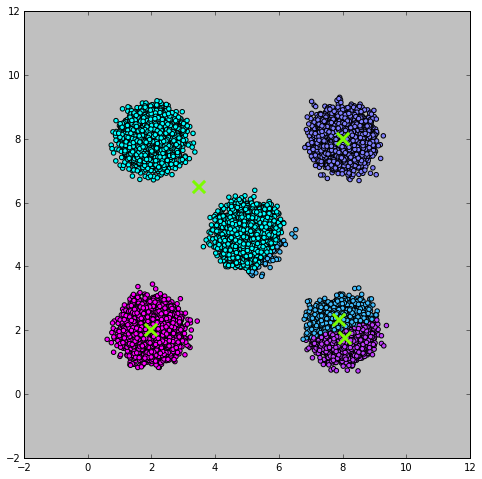

In [36]:
from K_Means_2D_Multi_Core import get_nearest_centroid

plot_data_x1 = []
plot_data_x2 = []
plot_data_y = []
for i in range(len(X_2d_multi)):
    plot_data_x1.append(X_2d_multi[i][0])
    plot_data_x2.append(X_2d_multi[i][1])
    plot_data_y.append(get_nearest_centroid(X_2d_multi[i][0], X_2d_multi[i][1], new_centroids))

centroid_x1 = []
centroid_x2 = []
for i in range(len(new_centroids)):
    centroid_x1.append(new_centroids[i][0])
    centroid_x2.append(new_centroids[i][1])

plt.figure(figsize=(8, 8))
p = plt.subplot(1, 1, 1, axisbg='Silver')
p.axis((-2, 12, -2, 12))
p.scatter(plot_data_x1, plot_data_x2, c = plot_data_y, cmap = "cool")
p.scatter(centroid_x1, centroid_x2, s=150, c='LawnGreen', marker='x', linewidths=3)
plt.show()

#### 4.A.5  Cluster Quality Table

This section prints a table showing into which cluster the points in each original class fall.  From this table, one can assess how well the k-means algorithm clustered the data points.  Check:  Are all the points from one class in the same cluster?  Does each cluster contain points from only one class?

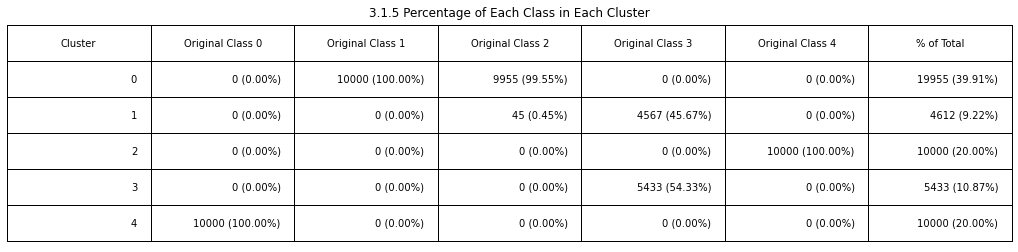

In [37]:
# Calculate table data
class_total = [sum(i) for i in zip(*class_counts)]
cluster_total = [sum(i) for i in class_counts]

table_data = []
for i in range(num_clusters):
    class_percentages = [i]
    for j in range(num_classes):
        try:
            class_percentages.append('%i (%.2f%s)' %(class_counts[i][j], class_counts[i][j]*1.0/class_total[j]*100, '%'))
        except:
            class_percentages.append('%i (%.2f%s)' %(class_counts[i][j], 0, '%'))
    class_percentages.append('%i (%.2f%s)' %(sum(class_counts[i]),sum(class_counts[i])*1.0/num_samples*100,'%'))
    table_data.append(class_percentages)

# Print the cluster and % of each class in that cluster in a table
col_labels = ["Cluster", "Original Class 0", "Original Class 1", "Original Class 2", 
              "Original Class 3", "Original Class 4", "% of Total"]
plot_table = plt.subplot()
ax1 = plt.axes(frameon=False)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
printed_table = plt.table(cellText=table_data, colLabels=col_labels, loc='center')
printed_table.scale(3,3)
plt.title('3.1.5 Percentage of Each Class in Each Cluster', y = 1)
plt.show()

### 4.B An N-Dimensional Example <a name="4.B"></a>
[Back to Table of Contents](#TOC)

#### 4.B.1 Create N-Dimensional Unit Test Dataset

This section creates the dataset for the N-dimensional distributed unit test.

In [3]:
import csv
import sklearn.datasets

def create_ND_clusters(num_classes, num_features, num_samples):
    X, y = sklearn.datasets.make_blobs(n_samples=num_samples, n_features=num_features, centers=num_classes, 
                                       cluster_std=1.0, center_box=(0.0, 10.0), shuffle=True, 
                                       random_state=2)
    return X, y

NUM_CLASSES = 5
NUM_DIMENSIONS = 100
NUM_SAMPLES = 50000
X_Nd_multi, y_Nd_multi = create_ND_clusters(NUM_CLASSES, NUM_DIMENSIONS, NUM_SAMPLES)

class_counts = [0]*NUM_CLASSES
# Write data to file
data_Nd_multi = []
for i in range(len(y_Nd_multi)):
    sample = []
    sample.append(y_Nd_multi[i])
    for j in range(NUM_DIMENSIONS):
        sample.append(X_Nd_multi[i][j])
    data_Nd_multi.append(sample)
    class_counts[y_Nd_multi[i]] += 1
with open('./data_Nd_multi.txt', 'wb') as outfile:
    data_writer = csv.writer(outfile)
    for sample in data_Nd_multi:
        data_writer.writerow(sample)

# Print class counts
for i in range(NUM_CLASSES):
    print 'Class %d Count: %d' %(i, class_counts[i])

Class 0 Count: 10000
Class 1 Count: 10000
Class 2 Count: 10000
Class 3 Count: 10000
Class 4 Count: 10000


#### 4.B.2  Define the Multi-Core K-Means N-Dimensional MRJob Class

This section is similar to Section 3.1.2, but it works with vectors using numpy instead of in individual dimensions.

In [4]:
%%writefile K_Means_MRJob_Class_ND.py

import csv
import numpy as np
from mrjob.job import MRJob
from mrjob.step import MRStep


class K_Means_MRJob_Class_ND(MRJob):
    
    
    # Allow import of the centroids file name, number of features, and number of classes
    def configure_options(self):
        super(K_Means_MRJob_Class_ND, self).configure_options()
        self.add_passthrough_option('--centroids_file', type='str', help='Centroids File for Uploading')
        self.add_passthrough_option('--num_features', type='str', help='Number of Features in the Input Data')
        self.add_passthrough_option('--num_classes', type='str', help='Number of Classes in the Input Data')
        return
    
    # Get the nearest centroid using Euclidean distance
    def get_nearest_centroid(self, data_point):
        centroids = np.array(self.centroids)
        # Calculate the Euclidean distance between the data_point and each of the centroids
        distances = np.sqrt(np.sum(np.square(np.subtract(data_point, centroids)), axis=1))              
        # Return the index of the nearest centroid for this data point
        return np.argmin(distances)
    
    # List steps of the map-reduce job
    def steps(self):
        return [
            MRStep(mapper_init=self.mapper_init,
                   mapper=self.mapper,
                   combiner=self.combiner,
                   reducer=self.reducer
                  )
               ]
        
    # Load the centroids
    def mapper_init(self):
        self.centroids = []
        with open(self.options.centroids_file, 'rb') as infile:
            data_reader = csv.reader(infile)
            for line in data_reader:
                centroid = [float(x) for x in line]
                self.centroids.append(centroid)
        return

    # Load data and output key=nearest_centroid_index and value=(true_class_count = 1, data_point, count=1)
    def mapper(self, _, line):
        inputs = (map(float,line.split(',')))
        true_class = inputs[0]
        data_point = inputs[1:]
        class_count = [0]*int(self.options.num_classes)
        class_count[int(true_class)] = 1
        yield int(self.get_nearest_centroid(data_point)), (class_count, data_point, 1)
    
    # Sum data_points for each cluster
    def combiner(self, cluster_num, inputdata):
        class_counts = np.array([0]*int(self.options.num_classes))
        sum_points = np.array([0.0]*int(self.options.num_features))
        count = 0
        for class_count, data_point, one in inputdata:
            class_counts += np.array(class_count)
            sum_points += np.array(data_point)
            count += one
        yield int(cluster_num), (class_counts.tolist(), sum_points.tolist(), int(count))
    
    # Sum data_points for each cluster and calculate the new centroids
    def reducer(self, cluster_num, inputdata):
        class_counts = np.array([0]*int(self.options.num_classes))
        centroid = np.array([0.0]*int(self.options.num_features))
        total = 0
        for class_count, sum_points, count in inputdata:
            class_counts += np.array(class_count)
            centroid += np.array(sum_points)
            total += count
        centroid = np.divide(centroid, total)  
        yield int(cluster_num), (class_counts.tolist(), centroid.tolist())

if __name__ == '__main__':
    K_Means_MRJob_Class_ND.run()

Overwriting K_Means_MRJob_Class_ND.py


#### 4.B.3  K-Means Utilities:  Define K-Means Cluster Assignment MRJob Class

In [5]:
%%writefile K_Means_Cluster_Assignments_Class_ND.py

import csv
import numpy as np
from mrjob.job import MRJob
from mrjob.step import MRStep


class K_Means_Cluster_Assignments_Class_ND(MRJob):
    
    # Allow import of the centroids file name
    def configure_options(self):
        super(K_Means_Cluster_Assignments_Class_ND, self).configure_options()
        self.add_passthrough_option('--centroids_file', type='str', help='Centroids File for Uploading')
        return
    
    # Get the nearest centroid using Euclidean distance
    def get_nearest_centroid(self, data_point):
        centroids = np.array(self.centroids)
        # Calculate the Euclidean distance between the data_point and each of the centroids
        distances = np.sqrt(np.sum(np.square(np.subtract(data_point, centroids)), axis=1))              
        # Return the index of the nearest centroid for this data point
        return np.argmin(distances)
    
    # List steps of the map-reduce job
    def steps(self):
        return [
            MRStep(mapper_init=self.mapper_init,
                   mapper=self.mapper
                  )
               ]
        
    # Load the centroids
    def mapper_init(self):
        self.centroids = []
        with open(self.options.centroids_file, 'rb') as infile:
            data_reader = csv.reader(infile)
            for line in data_reader:
                centroid = [float(x) for x in line]
                self.centroids.append(centroid)
        return

    # Load data and output key=nearest_centroid_index and value=None
    def mapper(self, _, line):
        inputs = (map(float,line.split(',')))
        data_point = inputs[1:]
        yield int(self.get_nearest_centroid(data_point)), None
    
if __name__ == '__main__':
    K_Means_Cluster_Assignments_Class_ND.run()

Overwriting K_Means_Cluster_Assignments_Class_ND.py


#### 4.B.4  K-Means Cluster Quality Meaure:  Define K-Means Purity Measure MRJob Class

In [78]:
### Exercise:  Define an MRJob class that calculates the Purity of a clustering

#### 4.B.5  K-Means Cluster Quality Measure:  Define K-Means Jaccard Index/Similarity Coefficient MRJob Class

In [79]:
### Exercise:  Define an MRJob class that calculates the Jaccard Index of a clustering

#### 4.B.6  K-Means Cluster Quality Measure:  Define K-Means Cosine Similarity MRJob Class

In [80]:
### Exercise:  Define an MRJob class that calculates the Cosine Similarity of a clustering

#### 4.B.7  K-Means Cluster Quality Measure:  Define K-Means Normalized Mutual Information MRJob Class

In [81]:
### Exercise:  Define an MRJob class that calculates the Normalized Mutual Information of a clustering

#### 4.B.8  K-Means Cluster Quality Measure:  Define K-Means Rand Index MRJob Class

In [82]:
### Exercise:  Define an MRJob class that calculates the Rand Index of a clustering

#### 4.B.9  K-Means Cluster Quality Measure:  Define K-Means F Measure MRJob Class

In [83]:
### Exercise:  Define an MRJob class that calculates the F Measure of a clustering

#### 4.B.10 Run K-Means:  Define Class to Run N-Dimensional MRJob Class Locally Through Python Driver

This section is similar to Section 3.1.3, but it works with vectors using numpy instead of in individual dimensions.

In [14]:
%reload_ext autoreload
%autoreload 2

import sys
import csv
import numpy as np
import copy
import time
from datetime import datetime
from matplotlib import pyplot as plt
from K_Means_MRJob_Class_ND import K_Means_MRJob_Class_ND
from K_Means_Cluster_Assignments_Class_ND import K_Means_Cluster_Assignments_Class_ND

% matplotlib inline


class K_Means_MRJob_Driver_ND():
    
    
    # Initialize the driver class variables
    def __init__(self, max_iterations, stop_threshold):
        self.max_iterations = max_iterations
        self.stop_threshold = stop_threshold
        self.centroids = []
        self.class_counts = []
        self.cluster_assignments = []
        self.infile = ''
        self.centroids_file = ''
        self.num_clusters = 0
        self.num_features = 0
        self.num_classes = 0
        self.num_samples = 0
        self.log_level = 0
        return

    # Randomly assign values of starting centroids
    def initialize_centroids(self):
        self.centroids = np.random.uniform(low=0.0, high=10.0, size=(self.num_clusters, self.num_features)).tolist()
        with open(self.centroids_file, 'wb') as outfile:
            data_writer = csv.writer(outfile)
            for centroid in self.centroids:
                data_writer.writerow(centroid)
        return
    
    # Define the termination criteria for the k-means algorithm
    def time_to_stop(self, old_centroids, iteration):
        flag = False
        if iteration >= self.max_iterations:
            flag = True
            print 'Maximum number of iterations reached.'
            return flag
        old_centroids = np.array(old_centroids)
        new_centroids = np.array(self.centroids)
        diffs = np.absolute(np.subtract(old_centroids, new_centroids))
        if np.amax(diffs) < self.stop_threshold:
            flag = True
            print 'Stopping threshold reached.  Number of iterations = %d.' %(iteration)
        else:
            flag = False
        return flag

    # Calculate the centroids by running iterations of the K_Means_MRJob_Class_ND
    def run_k_means(self, infile, centroids_file, num_clusters, num_features, num_classes, num_samples, log_level):
        self.infile = infile
        self.centroids_file = centroids_file
        self.num_clusters = num_clusters
        self.num_features = num_features
        self.num_classes = num_classes
        self.num_samples = num_samples
        self.log_level = log_level
        # Start the clock
        start_time = time.time()
        self.print_log(0, 'Start time: %s' %(datetime.now().strftime("%Y-%m-%d %H:%M:%S")))
        # Generate initial centroids and write to file
        self.initialize_centroids()
        self.print_log(1, 'Centroids initialized.')
        self.print_log(2, self.centroids)
        # Define MRJob for calculating new centroids
        mr_job_iteration = K_Means_MRJob_Class_ND(args=[self.infile, 
                                                        '--centroids_file', self.centroids_file,
                                                        '--num_features', str(self.num_features),
                                                        '--num_classes', str(self.num_classes),
                                                     #  '--runner', 'local'
                                                       ]
                                                 )
        # Update centroids iteratively
        iteration = 1
        while(1):
            # Start the iteration clock
            iteration_start = time.time()
            # Keep starting centroids to check for convergence
            old_centroids = copy.deepcopy(self.centroids[:])
            # Run the MRJob
            self.class_counts = [[0]*self.num_classes]*self.num_clusters
            with mr_job_iteration.make_runner() as runner: 
                runner.run()
                for line in runner.stream_output():
                    cluster_num, cluster_data =  mr_job_iteration.parse_output_line(line)
                    self.class_counts[cluster_num] = cluster_data[0]
                    self.centroids[cluster_num] = cluster_data[1]
                    self.print_log(2, ('Iteration %d Cluster %d Information:' %(iteration, cluster_num)))
                    self.print_log(2, cluster_data)
            # Write new centroids to file
            with open(self.centroids_file, 'wb') as outfile:
                data_writer = csv.writer(outfile)
                for centroid in self.centroids:
                    data_writer.writerow(centroid)
            # Check iteration time
            iteration_time = time.time() - iteration_start
            self.print_log(1, 'Iteration %d complete.  Elapsed time: %.2f minutes' %(iteration, iteration_time/60))
            # Check termination criteria
            if(self.time_to_stop(old_centroids, iteration)):
                break
            iteration += 1
        # Show elapsed time
        self.print_log(0, 'Algorithm Elapsed Time: %.2f minutes' %((time.time() - start_time)/60))
        # Get final cluster assignments
        self.print_log(0, 'Getting final cluster assignments ...')
        mr_job_assign = K_Means_Cluster_Assignments_Class_ND(args=[self.infile, 
                                                                   '--centroids_file', self.centroids_file
                                                                #  '--runner', 'local
                                                                  ]
                                                             )
        with mr_job_assign.make_runner() as runner: 
                runner.run()
                for line in runner.stream_output():
                    cluster_num, place_holder =  mr_job_assign.parse_output_line(line)
                    self.cluster_assignments.append(cluster_num)  
        self.print_log(0, 'K-Means complete.')
        return
        
    # Print a log message if it is at the chosen level of detail
    # log_level=0 Output: Only prints a statement that the job has run
    # log_level=1 Output: Prints statements that each iteration has run
    # log_level=2 Output: Prints output of each iteration
    def print_log(self, level, message):
        if level <= self.log_level:
            print message
            sys.stdout.flush()
        return
    
    # Return the final centroids
    def centroids(self):
        return self.centroids
    
    # Return the final cluster assignments
    def cluster_assignments(self):                
        return self.cluster_assignments
    
    # Print a confusion matrix of the cluster assignment results
    def confusion_matrix(self):
        # Calculate table data
        class_total = [np.sum(i) for i in zip(*(self.class_counts))]
        cluster_total = [np.sum(i) for i in self.class_counts]

        table_data = []
        for i in range(self.num_clusters):
            class_percentages = [i]
            for j in range(self.num_classes):
                try:
                    class_percentages.append('%i (%.2f%s)' %(self.class_counts[i][j], self.class_counts[i][j]*1.0/class_total[j]*100, '%'))
                except:
                    class_percentages.append('%i (%.2f%s)' %(self.class_counts[i][j], 0, '%'))
            class_percentages.append('%i (%.2f%s)' %(np.sum(self.class_counts[i]),np.sum(self.class_counts[i])*1.0/self.num_samples*100,'%'))
            table_data.append(class_percentages)
        # Create column labels
        col_labels = ["Cluster Number"]
        for i in range(self.num_classes):
            col_labels.append('Original Class ' + str(i))
        col_labels.append("% of Total")
        # Print table
        plot_table = plt.subplot()
        ax1 = plt.axes(frameon=False)
        ax1.xaxis.set_visible(False)
        ax1.yaxis.set_visible(False)
        printed_table = plt.table(cellText=table_data, colLabels=col_labels, loc='center')
        printed_table.scale(3,3)
        plt.show()
        return
    
    # Calculate a measure of the quality of the clustering using the true class
    # Measure values: 'purity', 'jaccard', 'cosine', 'normalized mutual information', 'rand', 'f'
    def external_quality_measure(self, measure):
        # Exercises:  Define MRJob Classes for each of these measures
        # Calculate Purity
        def purity(cluster_assignments):
            value = 0
            return value
        # Calculate Jaccard Index
        def jaccard(cluster_assignments):
            value = 0
            return value
        # Calculate Cosine Similarity
        def cosine(cluster_assignments):
            value = 0
            return value
        # Calculate Normalized Mutual Information
        def normalized_mutual_information(cluster_assignments):
            value = 0
            return value
        # Calculate Rand Index
        def rand_index(cluster_assignments):
            value = 0
            return value
        # Default: Calculate F Measure
        def f_measure(cluster_assignments):
            value = 0
            return value
        # Retrieve the proper measure
        if measure == 'purity':
            quality_measure = purity(self.cluster_assignments)
        elif measure == 'jaccard':
            quality_measure = jaccard(self.cluster_assignments)
        elif measure == 'cosine':
            quality_measure = cosine(self.cluster_assignments)
        elif measure == 'normalized mutual information':
            quality_measure = normalized_mutual_information(self.cluster_assignments)
        elif measure == 'rand':
            quality_measure = rand_index(self.cluster_assignments)
        else:
            quality_measure = f_measure(self.cluster_assignments)
        return quality_measure

#### 4.B.11  Run N-Dimensional MRJob Class Locally Through Python Driver

In [16]:
# Create a k-means N-dimensional multi-core class instance
k_means_Nd_Multi_Core = K_Means_MRJob_Driver_ND(max_iterations=250, stop_threshold=0.000001)

# Run the k-means algorithm for N-dimensional data
k_means_Nd_Multi_Core.run_k_means(infile='data_Nd_multi.txt', 
                                  centroids_file='/tmp/Centroids.txt', 
                                  num_clusters=5,
                                  num_features=NUM_DIMENSIONS, # for sparse data or data stored on HDFS
                                  num_classes=NUM_CLASSES,     # for evaluation purposes - ground truth value
                                  num_samples=NUM_SAMPLES,     # for presentation of results
                                  log_level=1)                 # for different levels of detail of log outputs


Start time: 2016-06-10 07:42:43
Centroids initialized.
Iteration 1 complete.  Elapsed time: 0.17 minutes
Iteration 2 complete.  Elapsed time: 0.17 minutes
Iteration 3 complete.  Elapsed time: 0.17 minutes
Iteration 4 complete.  Elapsed time: 0.17 minutes
Stopping threshold reached.  Number of iterations = 4.
Algorithm Elapsed Time: 0.68 minutes
Getting final cluster assignments ...
K-Means complete.


#### 4.B.12 Test K-Means Utility Functions

In [86]:
print k_means_Nd_Multi_Core.centroids[0]

[3.273338197604478, 2.9490119849762846, 5.457117990731871, 4.656756771025964, 3.5993529372756945, 4.204347971788602, 4.958817064377205, 7.159354368491803, 4.145158976736906, 5.3675974959123325, 3.2799061941067906, 3.405353446060569, 4.407220762908416, 4.498647672179077, 2.513635711825137, 6.7886301199436465, 6.12418402243779, 7.019039681032649, 6.174634198756712, 4.5670839311518465, 5.523804542805452, 4.875135610582125, 4.562240769192947, 5.274250791291025, 3.521283113496826, 3.1248332733311446, 4.827513557826248, 4.844423166515256, 1.5905531489856706, 6.579617010349405, 5.154464708976958, 4.714753694488286, 4.326326298001555, 7.123596245475459, 5.7455667833458826, 4.652491799143824, 8.77281863066245, 5.679803876734318, 3.472439765310288, 3.7266293493040235, 7.5562011407007, 6.2146964502896545, 6.298314769092005, 5.095334384583641, 5.640265555831115, 3.186144590827401, 4.913218543208665, 6.26341912007564, 4.369206230494653, 8.081367149532992, 3.019820379420833, 2.2769933142323167, 4.00

In [87]:
print k_means_Nd_Multi_Core.cluster_assignments[0:5]

[3, 0, 0, 4, 1]


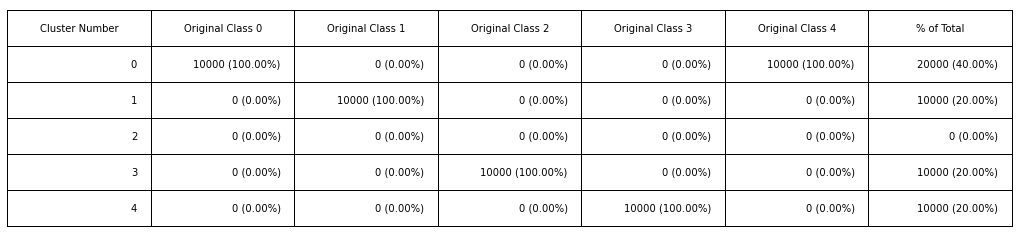

None


In [88]:
print k_means_Nd_Multi_Core.confusion_matrix()

In [89]:
print k_means_Nd_Multi_Core.external_quality_measure('purity')
print k_means_Nd_Multi_Core.external_quality_measure('jaccard')
print k_means_Nd_Multi_Core.external_quality_measure('cosine')
print k_means_Nd_Multi_Core.external_quality_measure('normalized mutual information')
print k_means_Nd_Multi_Core.external_quality_measure('rand')
print k_means_Nd_Multi_Core.external_quality_measure('f')

0
0
0
0
0
0


### 4.C An N-Dimensional Example with Dense Data <a name="4.C"></a>
[Back to Table of Contents](#TOC)

#### 4.C.1  Create N-Dimensional Unit Test Dataset With Dense Data

This section creates a generic dense dataset to use in a 4-dimensional distributed unit test.

In [42]:
import numpy as np
import csv

def create_ND_clusters_dense(num_samples):
    X = []
    y = []
    for i in range(num_samples):
        X.append([0, 0, 0, 0])
        y.append(0)
        X.append([1, 0, 0, 0])
        y.append(1)
        X.append([0, 1, 0, 0])
        y.append(2)
        X.append([0, 0, 1, 0])
        y.append(3)
        X.append([0, 0, 0, 1])
        y.append(4)
        X.append([1, 1, 0, 0])
        y.append(5)
        X.append([1, 0, 1, 0])
        y.append(6)
        X.append([1, 0, 0, 1])
        y.append(7)
        X.append([0, 1, 1, 0])
        y.append(8)
        X.append([0, 1, 0, 1])
        y.append(9)
        X.append([0, 0, 1, 1])
        y.append(10)
        X.append([1, 1, 1, 0])
        y.append(11)
        X.append([1, 1, 0, 1])
        y.append(12)
        X.append([1, 0, 1, 1])
        y.append(13)
        X.append([0, 1, 1, 1])
        y.append(14)
        X.append([1, 1, 1, 1])
        y.append(15)
    X = np.array(X)
    y = np.array(y)
    np.random.seed(10)
    shuffle = np.random.permutation(np.arange(len(X)))
    X, y = X[shuffle], y[shuffle]    
    return X.tolist(), y.tolist()

num_classes = 16
num_samples_per_class = 10000

X_Nd_dense_multi, y_Nd_dense_multi = create_ND_clusters_dense(num_samples=num_samples_per_class)

data_Nd_dense_multi = []
for i in range(len(y_Nd_dense_multi)):
    sample = []
    sample.append(y_Nd_dense_multi[i])
    for j in range(4):
        sample.append(X_Nd_dense_multi[i][j])
    data_Nd_dense_multi.append(sample)

with open('./data_Nd_dense_multi.txt', 'wb') as outfile:
    data_writer = csv.writer(outfile)
    for sample in data_Nd_dense_multi:
        data_writer.writerow(sample)

#### 4.C.2  Define the Multi-Core K-Means N-Dimensional MRJob Class For Dense Data

This section is identical to Section 3.2.2.

In [43]:
%%writefile K_Means_ND_Multi_Core_Dense.py
import csv
import numpy as np
from mrjob.job import MRJob
from mrjob.step import MRStep


def get_nearest_centroid(data_point, centroids):
        data_point = np.array(data_point)
        centroids = np.array(centroids)
        distances = np.sqrt(np.sum(np.square(np.subtract(data_point, centroids)), axis=1))              
        # Get the nearest centroid
        nearest_centroid_index = np.argmin(distances)
        return nearest_centroid_index


class K_Means_ND_Multi_Core_Dense(MRJob):

    
    def steps(self):
        return [
            MRStep(mapper_init = self.mapper_init, 
                   mapper = self.mapper,
                   reducer=self.reducer)
               ]
    
    def mapper_init(self):
        # Load initial centroids from file
        K_Means_ND_Multi_Core_Dense.centroids = []
        with open('/tmp/Centroids.txt', 'rb') as infile:
            data_reader = csv.reader(infile)
            for line in data_reader:
                centroid = [float(x) for x in line]
                self.centroids.append(centroid)
        K_Means_ND_Multi_Core_Dense.k = len(self.centroids)
        K_Means_ND_Multi_Core_Dense.num_features = len(self.centroids[0])
        K_Means_ND_Multi_Core_Dense.classes = []
        
    # Load data and output the nearest centroid index, true class, data point, and count
    def mapper(self, _, line):
        inputs = (map(float,line.split(',')))
        if inputs[0] not in self.classes:
            self.classes.append(inputs[0])
        data_point = inputs[1:]
        yield int(get_nearest_centroid(data_point, self.centroids)), (int(inputs[0]), data_point, 1)
    
    # Aggregate sums for each cluster and then calculate the new centroids
    def reducer(self, cluster, inputdata):
        class_count = np.array([0]*len(self.classes))
        centroids = np.array([0.0]*self.num_features)
        num = 0
        for true_class, sum_points, n in inputdata:
            class_count[true_class] += n
            num += n
            centroids += np.array(sum_points)
        centroids = np.divide(centroids, num)    
        yield cluster, (list(class_count), list(centroids))

if __name__ == '__main__':
    K_Means_ND_Multi_Core_Dense.run()

Overwriting K_Means_ND_Multi_Core_Dense.py


#### 4.C.3  Run N-Dimensional MRJob Class Locally Through Python Driver For Dense Data

This section is identical to Section 3.2.3.

In [53]:
%reload_ext autoreload
%autoreload 2

import csv
import numpy as np
import copy
from K_Means_ND_Multi_Core_Dense import K_Means_ND_Multi_Core_Dense

# Initialize parameters
num_features = 4
num_classes = 16
num_samples = 160000
num_clusters = 16

def initialize_centroids(num_clusters, num_features):
    centroids = np.random.uniform(low=0.0, high=10.0, size=(num_clusters, num_features))
    with open('/tmp/Centroids.txt', 'wb') as outfile:
        data_writer = csv.writer(outfile)
        for centroid in centroids:
            data_writer.writerow(centroid)
    return centroids

def time_to_stop(old_centroids, new_centroids, iteration, stop_threshold, max_iterations):
    flag = False
    if iteration >= max_iterations:
        flag = True
        print 'Maximum number of iterations reached.'
        return flag
    old_centroids = np.array(old_centroids)
    new_centroids = np.array(new_centroids)
    diffs = np.absolute(np.subtract(old_centroids, new_centroids))
    if np.amax(diffs) < stop_threshold:
        flag = True
        print 'Stopping threshold reached.  Number of iterations = %d.' %(iteration)
    else:
        flag = False
    return flag

# RUN K-MEANS ALGORITHM
# Generate initial centroids and write to file
new_centroids = initialize_centroids(num_clusters=num_clusters, num_features=num_features)

# Define MRJob 
mr_job = K_Means_ND_Multi_Core_Dense(args=['data_Nd_dense_multi.txt'])

# Update centroids iteratively
iteration = 1
while(1):
    # Keep starting centroids to check for convergence
    old_centroids = copy.deepcopy(new_centroids[:])
    class_counts = [[0]*num_classes]*num_clusters
    # Run the MRJob
    with mr_job.make_runner() as runner: 
        runner.run()
        for line in runner.stream_output():
            key, value =  mr_job.parse_output_line(line)
            class_counts[key] = value[0]
            new_centroids[key] = value[1]
    # Write new centroids to file
    with open('/tmp/Centroids.txt', 'wb') as outfile:
            data_writer = csv.writer(outfile)
            for centroid in new_centroids:
                data_writer.writerow(centroid)
    # Check termination criteria
    if iteration%100 == 0:
        print 'Iteration %d complete.' %(iteration)
    if(time_to_stop(old_centroids, new_centroids, iteration, 0.000001, 500)):
        break
    iteration += 1 

Stopping threshold reached.  Number of iterations = 3.


#### 4.C.4  Cluster Quality Table for N-Dimensional Dense Data

This section prints a table showing into which cluster the points in each original class fall.  From this table, one can assess how well the k-means algorithm clustered the data points.  Check:  Are all the points from one class in the same cluster?  Does each cluster contain points from only one class?

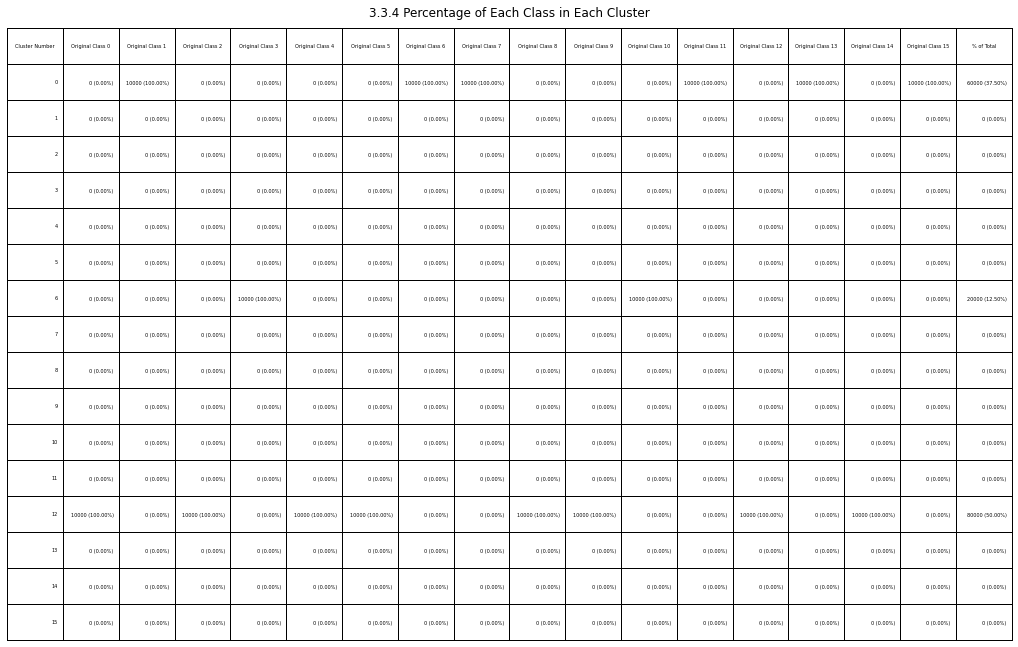

In [54]:
import matplotlib.pyplot as plt

% matplotlib inline

# Calculate table data
class_total = [sum(i) for i in zip(*class_counts)]
cluster_total = [sum(i) for i in class_counts]

table_data = []
for i in range(num_clusters):
    class_percentages = [i]
    for j in range(num_classes):
        try:
            class_percentages.append('%i (%.2f%s)' %(class_counts[i][j], class_counts[i][j]*1.0/class_total[j]*100, '%'))
        except:
            class_percentages.append('%i (%.2f%s)' %(class_counts[i][j], 0, '%'))
    class_percentages.append('%i (%.2f%s)' %(sum(class_counts[i]),sum(class_counts[i])*1.0/(num_samples_per_class*num_classes)*100,'%'))
    table_data.append(class_percentages)

# Print the cluster and % of each class in that cluster in a table
col_labels = ["Cluster Number", "Original Class 0", "Original Class 1", 
              "Original Class 2", "Original Class 3", "Original Class 4",
              "Original Class 5", "Original Class 6", "Original Class 7",
              "Original Class 8", "Original Class 9", "Original Class 10",
              "Original Class 11", "Original Class 12", "Original Class 13",
              "Original Class 14", "Original Class 15", "% of Total"]
plot_table = plt.subplot()
ax1 = plt.axes(frameon=False)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
printed_table = plt.table(cellText=table_data, colLabels=col_labels, loc='center')
printed_table.scale(3,3)
plt.title('3.3.4 Percentage of Each Class in Each Cluster', y = 1.9)
plt.show()

### 4.D An N-Dimensional Example with Sparse Data <a name="4.D"></a>
[Back to Table of Contents](#TOC)

#### 4.D.1 Create N-Dimensional Unit Test Dataset With Sparse Data

This section creates a generic sparse dataset to use in a 4-dimensional distributed unit test.

In [55]:
import numpy as np
import csv

def create_ND_clusters_sparse(num_samples):
    X = []
    y = []
    for i in range(num_samples):
        X.append([0])
        y.append(0)
        X.append([1])
        y.append(1)
        X.append([2])
        y.append(2)
        X.append([3])
        y.append(3)
        X.append([0, 1])
        y.append(4)
        X.append([0, 2])
        y.append(5)
        X.append([0, 3])
        y.append(6)
        X.append([1, 2])
        y.append(7)
        X.append([1, 3])
        y.append(8)
        X.append([2, 3])
        y.append(9)
        X.append([0, 1, 2])
        y.append(10)
        X.append([0, 1, 3])
        y.append(11)
        X.append([0, 2, 3])
        y.append(12)
        X.append([1, 2, 3])
        y.append(13)
        X.append([0, 1, 2, 3])
        y.append(14)
    X = np.array(X)
    y = np.array(y)
    np.random.seed(10)
    shuffle = np.random.permutation(np.arange(len(X)))
    X, y = X[shuffle], y[shuffle]    
    return X.tolist(), y.tolist()

num_classes = 15
num_samples_per_class = 10000

X_Nd_sparse_multi, y_Nd_sparse_multi = create_ND_clusters_sparse(num_samples=num_samples_per_class)

data_Nd_sparse_multi = []
for i in range(len(y_Nd_sparse_multi)):
    sample = []
    sample.append(y_Nd_sparse_multi[i])
    for j in range(len(X_Nd_sparse_multi[i])):
        sample.append(X_Nd_sparse_multi[i][j])
    data_Nd_sparse_multi.append(sample)

with open('./data_Nd_sparse_multi.txt', 'wb') as outfile:
    data_writer = csv.writer(outfile)
    for sample in data_Nd_sparse_multi:
        data_writer.writerow(sample)

#### 4.D.2  Define the Multi-Core K-Means N-Dimensional MRJob Class For Sparse Data

We adapt the code for the function 'get_nearest_centroid' in Section 3.3.2 so that we do not have to expand out the sparse vectors.

In [56]:
%%writefile K_Means_ND_Multi_Core_Sparse.py
import csv
import numpy as np
import copy
from mrjob.job import MRJob
from mrjob.step import MRStep

def get_nearest_centroid(sparse_vector, centroids):
    # Define function to calculate difference between a sparse vector and a centroid
    def calc_difference(centroid):
        diff = copy.deepcopy(centroid)
        for i in range(len(sparse_vector)):
            diff[int(sparse_vector[i])] -= 1
        return diff
    # Calculate Euclidean distance between data point and centroids
    distances = np.sqrt(np.sum(np.square(np.array(map(calc_difference, centroids))), axis=1))
    # Get the nearest centroid
    nearest_centroid_index = np.argmin(distances)
    return nearest_centroid_index


class K_Means_ND_Multi_Core_Sparse(MRJob):

    
    def steps(self):
        return [
            MRStep(mapper_init = self.mapper_init, 
                   mapper = self.mapper,
                   reducer=self.reducer)
               ]
    
    def mapper_init(self):
        # Load initial centroids from file
        K_Means_ND_Multi_Core_Sparse.centroids = []
        with open('/tmp/Centroids.txt', 'rb') as infile:
            data_reader = csv.reader(infile)
            for line in data_reader:
                centroid = [float(x) for x in line]
                self.centroids.append(centroid)
        K_Means_ND_Multi_Core_Sparse.k = len(self.centroids)
        K_Means_ND_Multi_Core_Sparse.num_features = len(self.centroids[0])
        K_Means_ND_Multi_Core_Sparse.classes = []
        
    # Load data and output the nearest centroid index, true class, data point, and count
    def mapper(self, _, line):
        inputs = (map(float,line.split(',')))
        if inputs[0] not in self.classes:
            self.classes.append(inputs[0])
        sparse_vector = inputs[1:]
        yield int(get_nearest_centroid(sparse_vector, self.centroids)), (int(inputs[0]), sparse_vector, 1)
    
    # Aggregate sums for each cluster and then calculate the new centroids
    def reducer(self, cluster, inputdata):
        class_count = np.array([0]*len(self.classes))
        centroid = np.array([0.0]*self.num_features)
        num = 0
        for true_class, sparse_vector, n in inputdata:
            class_count[true_class] += n
            num += n
            for i in range(len(sparse_vector)):
                centroid[int(sparse_vector[i])] += 1
        centroid = np.divide(centroid, num)    
        yield cluster, (list(class_count), list(centroid))

if __name__ == '__main__':
    K_Means_ND_Multi_Core_Sparse.run()

Overwriting K_Means_ND_Multi_Core_Sparse.py


#### 4.D.3  Run N-Dimensional MRJob Class Locally Through Python Driver For Sparse Data

This code is identical to Section 3.3.3.

In [57]:
%reload_ext autoreload
%autoreload 2

import csv
import numpy as np
import copy
from K_Means_ND_Multi_Core_Sparse import K_Means_ND_Multi_Core_Sparse

# Initialize parameters
num_features = 4
num_classes = 15
num_samples = num_samples_per_class*num_classes
num_clusters = 15


def initialize_centroids(num_clusters, num_features):
    centroids = np.random.uniform(low=0.0, high=1.0, size=(num_clusters, num_features))
    with open('/tmp/Centroids.txt', 'wb') as outfile:
        data_writer = csv.writer(outfile)
        for centroid in centroids:
            data_writer.writerow(centroid) 
    return centroids

def time_to_stop(old_centroids, new_centroids, iteration, stop_threshold, max_iterations):
    flag = False
    if iteration >= max_iterations:
        flag = True
        print 'Maximum number of iterations reached.'
        return flag
    old_centroids = np.array(old_centroids)
    new_centroids = np.array(new_centroids)
    diffs = np.absolute(np.subtract(old_centroids, new_centroids))
    if np.amax(diffs) < stop_threshold:
        flag = True
        print 'Stopping threshold reached.  Number of iterations = %d.' %(iteration)
    else:
        flag = False
    return flag


# RUN K-MEANS ALGORITHM
# Generate initial centroids and write to file
new_centroids = initialize_centroids(num_clusters=num_clusters, num_features=num_features)

# Define MRJob 
mr_job = K_Means_ND_Multi_Core_Sparse(args=['data_Nd_sparse_multi.txt'])

# Update centroids iteratively
iteration = 1
while(1):
    # Keep starting centroids to check for convergence
    old_centroids = copy.deepcopy(new_centroids[:])
    class_counts = [[0]*num_classes]*num_clusters
    # Run the MRJob
    with mr_job.make_runner() as runner: 
        runner.run()
        for line in runner.stream_output():
            key, value =  mr_job.parse_output_line(line)
            class_counts[key] = value[0]
            new_centroids[key] = value[1]
    # Write new centroids to file
    with open('/tmp/Centroids.txt', 'wb') as outfile:
            data_writer = csv.writer(outfile)
            for centroid in new_centroids:
                data_writer.writerow(centroid)
    # Check termination criteria
    if iteration%100 == 0:
        print 'Iteration %d complete.' %(iteration)
    if(time_to_stop(old_centroids, new_centroids, iteration, 0.000001, 500)):
        break
    iteration += 1 

Stopping threshold reached.  Number of iterations = 2.


#### 4.D.4  Cluster Quality Table for Sparse Data

This section prints a table showing into which cluster the points in each original class fall.  From this table, one can assess how well the k-means algorithm clustered the data points.  Check:  Are all the points from one class in the same cluster?  Does each cluster contain points from only one class?

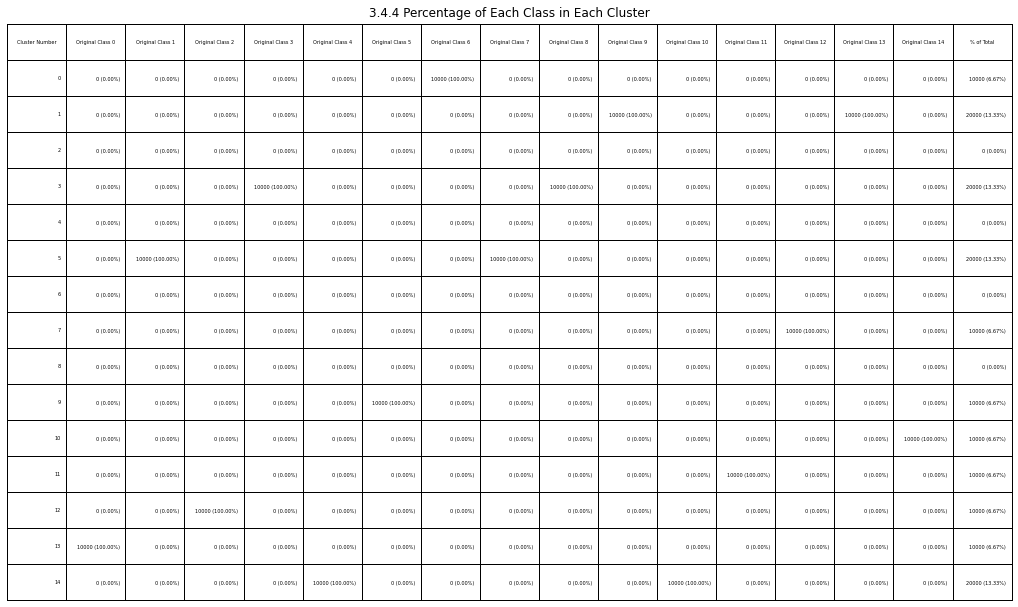

In [58]:
import matplotlib.pyplot as plt

% matplotlib inline

# Calculate table data
class_total = [np.sum(i) for i in zip(*class_counts)]
cluster_total = [np.sum(i) for i in class_counts]

table_data = []
for i in range(num_clusters):
    class_percentages = [i]
    for j in range(num_classes):
        try:
            class_percentages.append('%i (%.2f%s)' %(class_counts[i][j], class_counts[i][j]*1.0/class_total[j]*100, '%'))
        except:
            class_percentages.append('%i (%.2f%s)' %(class_counts[i][j], 0, '%'))
    class_percentages.append('%i (%.2f%s)' %(np.sum(class_counts[i]),np.sum(class_counts[i])*1.0/(num_samples_per_class*num_classes)*100,'%'))
    table_data.append(class_percentages)

# Print the cluster and % of each class in that cluster in a table
col_labels = ["Cluster Number", "Original Class 0", "Original Class 1", 
              "Original Class 2", "Original Class 3", "Original Class 4",
              "Original Class 5", "Original Class 6", "Original Class 7",
              "Original Class 8", "Original Class 9", "Original Class 10",
              "Original Class 11", "Original Class 12", "Original Class 13",
              "Original Class 14", "% of Total"]
plot_table = plt.subplot()
ax1 = plt.axes(frameon=False)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
printed_table = plt.table(cellText=table_data, colLabels=col_labels, loc='center')
printed_table.scale(3,3)
plt.title('3.4.4 Percentage of Each Class in Each Cluster', y = 1.8)
plt.show()